In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date
import numpy as np
import pandas as pd
from pandas import DataFrame

In [3]:
#Option pricing functions from 
#https://medium.com/swlh/calculating-option-premiums-using-the-black-scholes-model-in-python-e9ed227afbee
#Use this to check that results derived using simulations make sense 

def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2/2.)*T)/(sigma*sqrt(T))

def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)

def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))
  
def bs_put(S,K,T,r,sigma):
    return K*exp(-r*T)-S*bs_call(S,K,T,r,sigma)


#Geometric Brownian motion path generator function for simulations
def gen_paths(S0, r, sigma, T, M, I):
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * rand)
    return paths

#### The following section of code attempts to describe how option prices evolve as variables fluctuate within a range
* all parameters types are tested
* Vary the strike price, this will mean that our ITM bar will rise and fall and will illustrate 

In [ ]:
def plot_set(S0, r, sigma, T, N, i,K,title_in):
    for y in range(0,i-1):
        paths = gen_paths(S0, r, sigma, T, N, i)
        axs[idx].plot(paths[:,y],color='black',alpha = 0.2)
        axs[idx].axhline(y = K, color = 'red', linestyle = '-') 
        axs[idx].set_ylim(0,250)
        axs[idx].set_title(title_in)
        mask = ma.masked_less(paths[:,y], K)
        #axs[idx].plot(mask,color='red',alpha = 0.2)
        axs[idx].set_xlabel('Steps')
        axs[idx].set_ylabel('Stock Price')
        
plt.tight_layout()      
np.random.seed(123)
import numpy.ma as ma
#This section of code defines a range for each parameter of interest
#then it will loop over the range for a given parameter, and will plot the stored result 
S0 = 100
K = 130
r = 0.05
sigma = 0.50
T = 1
N = 252

i = 100
discount_factor = np.exp(-r * T)





####### Plot for different strike
K_set =[80,90,100,150]
fig, axs = plt.subplots(1,len(K_set), figsize=(15, 5))
for idx,val in enumerate(K_set):
    K = val
    in_title = f"Strike price of: ${val}"
    plot_set(S0, r, sigma, T, N, i,K,in_title)

####### Plot for different VOL
K=100
sigma_set =[.1,.3,.5,.8]
fig, axs = plt.subplots(1,len(sigma_set), figsize=(15, 5))
for idx,val in enumerate(sigma_set):
    sigma = val
    in_title = f"Sigma of: {val}"
    plot_set(S0, r, sigma, T, N, i,K,in_title)

####### Plot for different starting
sigma = 0.5
start_set =[50,80,100,120]
fig, axs = plt.subplots(1,len(start_set), figsize=(15, 5))
for idx,val in enumerate(start_set):
    S0 = val
    in_title = f"Initial price of: ${val}"
    plot_set(S0, r, sigma, T, N, i,K,in_title)
 


# plt.title('Simulations %d Steps %d Sigma %.2f r %.2f S0 %.2f' % (i, N, sigma, r, S0))
# plt.xlabel('Steps')
# plt.ylabel('Stock Price')
# plt.show()

<Figure size 432x288 with 0 Axes>

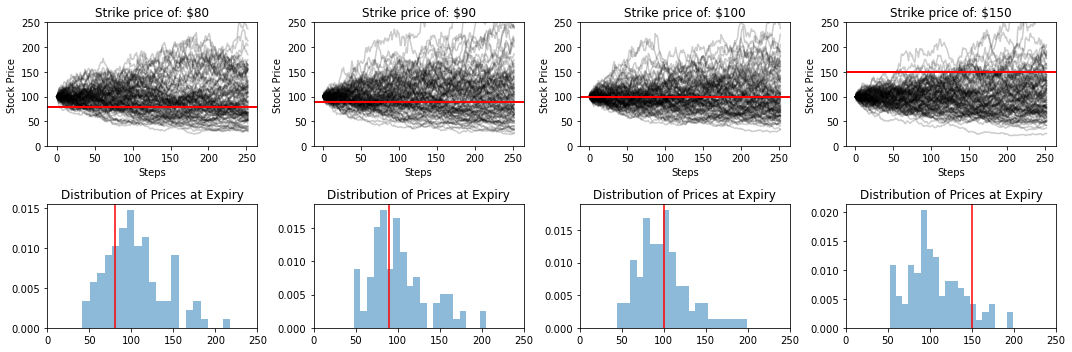

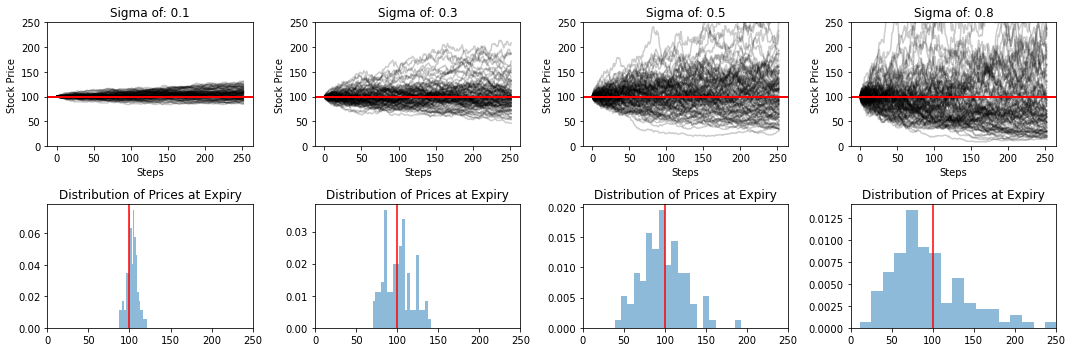

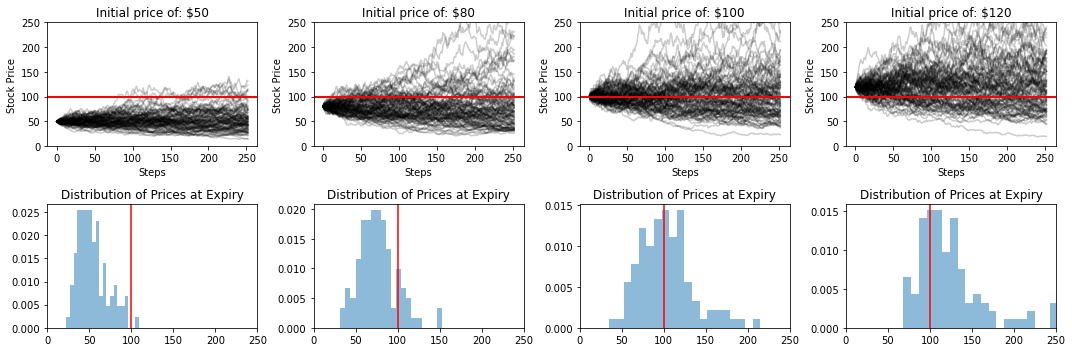

In [39]:
def plot_set(S0, r, sigma, T, N, i,K,title_in):
    for y in range(0,i-1):
        paths = gen_paths(S0, r, sigma, T, N, i)
        axs[0,idx].plot(paths[:,y],color='black',alpha = 0.2)
        axs[0,idx].axhline(y = K, color = 'red', linestyle = '-') 
        axs[0,idx].set_ylim(0,250)
        axs[0,idx].set_title(title_in)
        #mask = ma.masked_less(paths[:,y], K)
        #axs[idx].plot(mask,color='red',alpha = 0.2)
        axs[0,idx].set_xlabel('Steps')
        axs[0,idx].set_ylabel('Stock Price')
    axs[1,idx].hist(paths[y], alpha=0.5, bins=20, density=True)
    axs[1,idx].set_title("Distribution of Prices at Expiry")
    axs[1,idx].set_xlim(0,250)
    axs[1,idx].axvline(x = K, color = 'r', label = 'axvline - full height')
        
        
plt.tight_layout()      
np.random.seed(123)
import numpy.ma as ma
#This section of code defines a range for each parameter of interest
#then it will loop over the range for a given parameter, and will plot the stored result 
S0 = 100
K = 130
r = 0.05
sigma = 0.50
T = 1
N = 252
i = 100
discount_factor = np.exp(-r * T)





####### Plot for different strike
K_set =[80,90,100,150]
fig, axs = plt.subplots(2,len(K_set), figsize=(15, 5))
for idx,val in enumerate(K_set):
    K = val
    in_title = f"Strike price of: ${val}"
    plot_set(S0, r, sigma, T, N, i,K,in_title)
    
fig.tight_layout()
####### Plot for different VOL
K=100
sigma_set =[.1,.3,.5,.8]
fig, axs = plt.subplots(2,len(sigma_set), figsize=(15, 5))
for idx,val in enumerate(sigma_set):
    sigma = val
    in_title = f"Sigma of: {val}"
    plot_set(S0, r, sigma, T, N, i,K,in_title)
fig.tight_layout()

####### Plot for different starting
sigma = 0.5
start_set =[50,80,100,120]
fig, axs = plt.subplots(2,len(start_set), figsize=(15, 5))
for idx,val in enumerate(start_set):
    S0 = val
    in_title = f"Initial price of: ${val}"
    plot_set(S0, r, sigma, T, N, i,K,in_title)
fig.tight_layout()



# plt.title('Simulations %d Steps %d Sigma %.2f r %.2f S0 %.2f' % (i, N, sigma, r, S0))
# plt.xlabel('Steps')
# plt.ylabel('Stock Price')
# plt.show()

<AxesSubplot:>

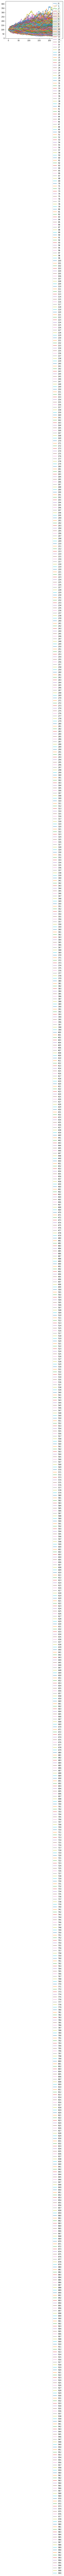

In [ ]:
pd.DataFrame(paths).plot()